<a href="https://colab.research.google.com/github/Um333r/Time_series/blob/master/Reliance_EDA_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import statsmodels.api as sms
from datetime import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
shares=pd.read_csv("/content/Reliance.csv")
shares

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0
...,...,...,...,...,...,...,...
1228,2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0
1229,2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0
1230,2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0
1231,2020-11-13,1982.000000,2036.650024,1981.750000,1996.400024,1996.400024,20946864.0


In [5]:
shares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1233 non-null   object 
 1   Open       1232 non-null   float64
 2   High       1232 non-null   float64
 3   Low        1232 non-null   float64
 4   Close      1232 non-null   float64
 5   Adj Close  1232 non-null   float64
 6   Volume     1232 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.6+ KB


In [6]:
shares.duplicated().sum()

0

In [7]:
shares.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [8]:
shares1=shares.dropna()
shares1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0
...,...,...,...,...,...,...,...
1228,2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0
1229,2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0
1230,2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0
1231,2020-11-13,1982.000000,2036.650024,1981.750000,1996.400024,1996.400024,20946864.0


In [9]:
shares1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
shares1['Date']=pd.to_datetime(shares1['Date'])
shares1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0
...,...,...,...,...,...,...,...
1228,2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0
1229,2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0
1230,2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0
1231,2020-11-13,1982.000000,2036.650024,1981.750000,1996.400024,1996.400024,20946864.0


In [11]:
shares1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 0 to 1232
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1232 non-null   datetime64[ns]
 1   Open       1232 non-null   float64       
 2   High       1232 non-null   float64       
 3   Low        1232 non-null   float64       
 4   Close      1232 non-null   float64       
 5   Adj Close  1232 non-null   float64       
 6   Volume     1232 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 77.0 KB


In [12]:
shares1=shares1.set_index("Date")
shares1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0
...,...,...,...,...,...,...
2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0
2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0
2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0


In [13]:
shares1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0


In [14]:
shares1.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-10,2077.0,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0
2020-11-11,2089.0,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0
2020-11-12,1981.0,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0
2020-11-13,1982.0,2036.650024,1981.750000,1996.400024,1996.400024,20946864.0
2020-11-17,2085.0,2085.000000,1985.000000,1993.250000,1993.250000,21479385.0


# Data Visualization

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

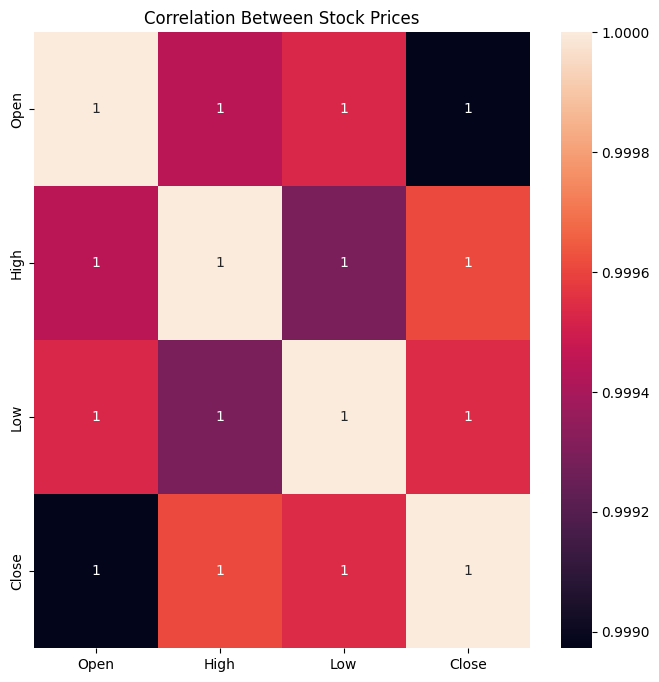

In [16]:
plt.figure(figsize=(8,8))
sns.heatmap(shares1[['Open','High','Low','Close']].corr(),annot=True)
plt.title("Correlation Between Stock Prices")
plt.show()

<Axes: xlabel='Date'>

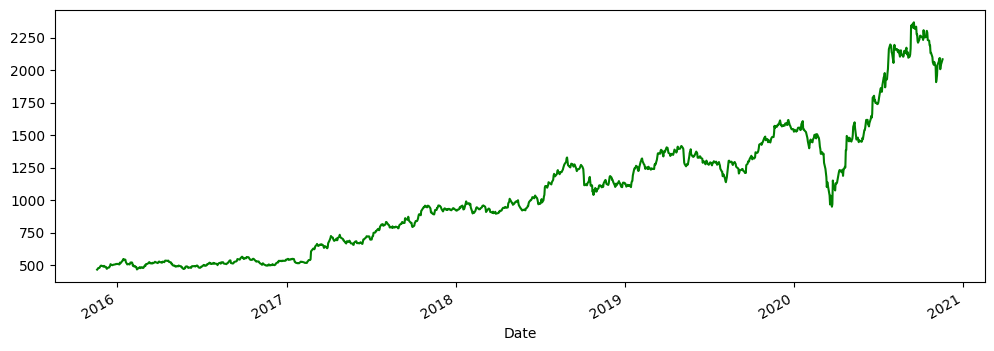

In [17]:
shares1['High'].plot(figsize=(12,4),c='green')

<Axes: xlabel='Date'>

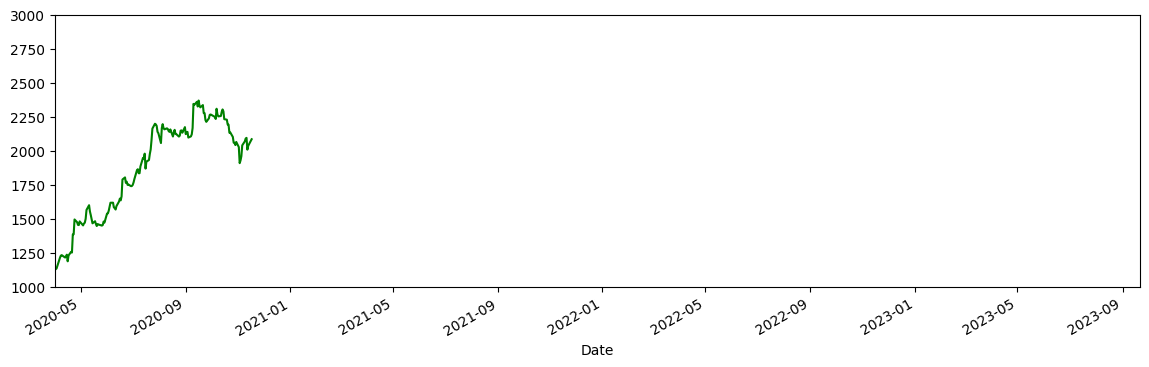

In [18]:
shares1['High'].plot(xlim=['2020-04-01','2023-09-21'],ylim=[1000,3000],figsize=(14,4),c='green')

In [19]:
index=shares1.loc['2020-04-01':'2023-09-21'].index
shares1_open=shares1.loc['2020-04-01':'2023-09-21']['Open']

In [20]:
shares1_open

Date
2020-04-01    1122.250000
2020-04-03    1134.449951
2020-04-07    1102.099976
2020-04-08    1180.000000
2020-04-09    1214.000000
                 ...     
2020-11-10    2077.000000
2020-11-11    2089.000000
2020-11-12    1981.000000
2020-11-13    1982.000000
2020-11-17    2085.000000
Name: Open, Length: 157, dtype: float64

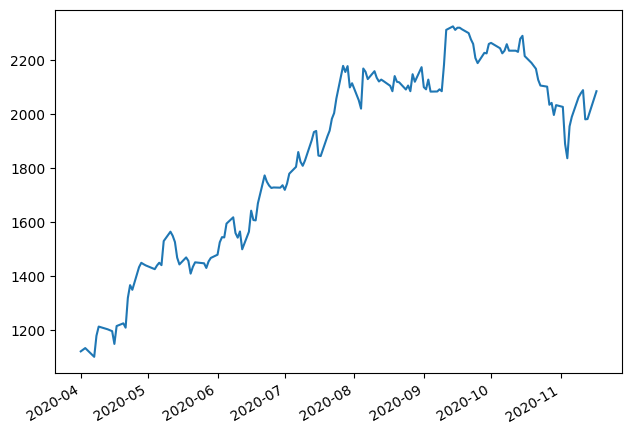

In [21]:
figure,axis=plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index,shares1_open)

Resample is used in time series for frequency conversion and resampling of time series.

In [22]:
###Frequency at End of the Year
shares1.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,459.450012,465.649994,454.975006,456.000000,436.671021,3443452.0
2016-12-31,459.000000,466.950012,444.049988,453.274994,434.061554,1822820.0
2017-12-31,508.500000,514.400024,506.399994,507.950012,496.626129,1602158.0
2018-12-31,877.000000,895.849976,871.000000,882.700012,869.290222,1283997.0
2019-12-31,1095.000000,1100.500000,1081.099976,1092.750000,1082.722900,3935460.0
2020-12-31,916.200012,950.000000,875.650024,884.049988,880.742920,4719245.0


In [23]:
shares1.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,507.500000,509.850006,503.575012,507.700012,486.179596,13678054.0
2016-12-31,558.500000,564.775024,553.299988,555.400024,543.018372,32825622.0
2017-12-31,955.950012,959.500000,947.400024,952.549988,938.079102,58207852.0
2018-12-31,1316.300049,1329.000000,1295.000000,1319.000000,1306.896851,25898694.0
2019-12-31,1615.000000,1617.550049,1596.099976,1609.949951,1603.927490,47923444.0
2020-12-31,2325.000000,2369.350098,2310.550049,2324.550049,2324.550049,65230035.0


<Axes: xlabel='Date'>

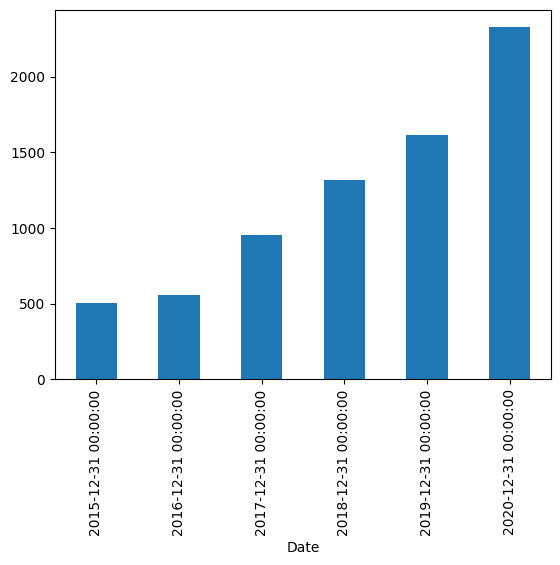

In [24]:
shares1['Open'].resample(rule='A').max().plot(kind='bar')

<Axes: xlabel='Date'>

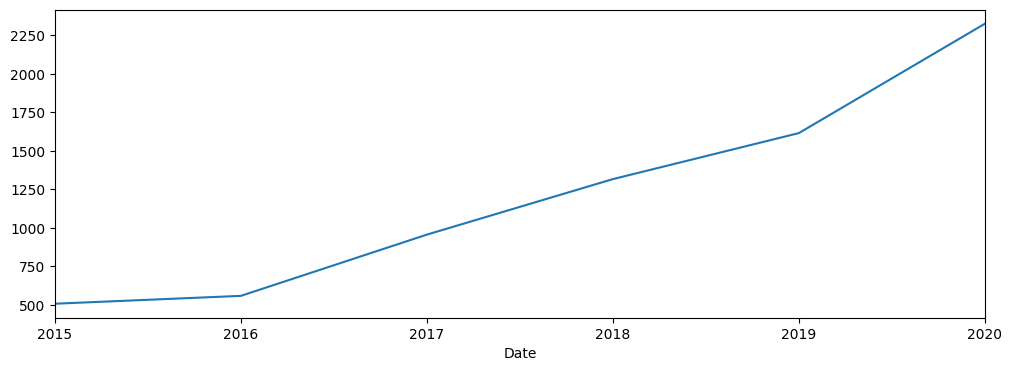

In [25]:
shares1.resample(rule='A').max()['Open'].plot(figsize=(12,4))

In [26]:
###Quarterly Start Frequency
shares1.resample(rule='QS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-10-01,507.500000,509.850006,503.575012,507.700012,486.179596,13678054.0
2016-01-01,537.500000,544.875000,532.799988,538.424988,515.602234,32825622.0
2016-04-01,534.599976,534.950012,527.700012,533.025024,521.142151,28321014.0
2016-07-01,558.500000,564.775024,553.299988,555.250000,542.871643,19484908.0
2016-10-01,557.000000,563.125000,553.250000,555.400024,543.018372,19936484.0
2017-01-01,659.424988,668.825012,649.025024,660.450012,645.726440,58207852.0
2017-04-01,730.000000,733.875000,715.299988,719.250000,703.215576,24202054.0
2017-07-01,856.099976,872.500000,845.099976,849.000000,836.102234,44410224.0
2017-10-01,955.950012,959.500000,947.400024,952.549988,938.079102,16765178.0


<Axes: xlabel='Date'>

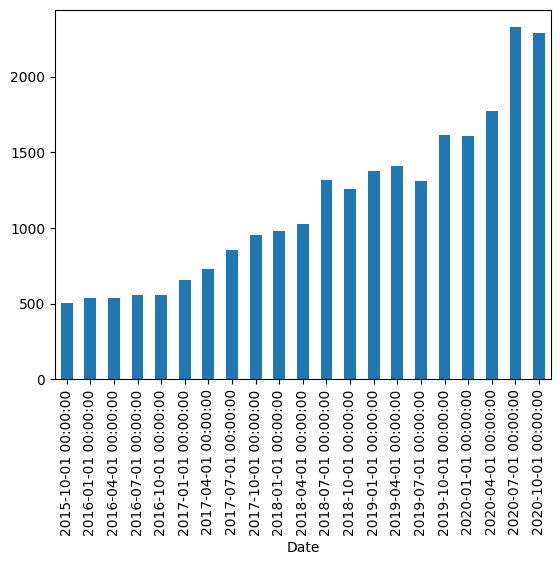

In [27]:
shares1['Open'].resample(rule='QS').max().plot(kind='bar')

<Axes: xlabel='Date'>

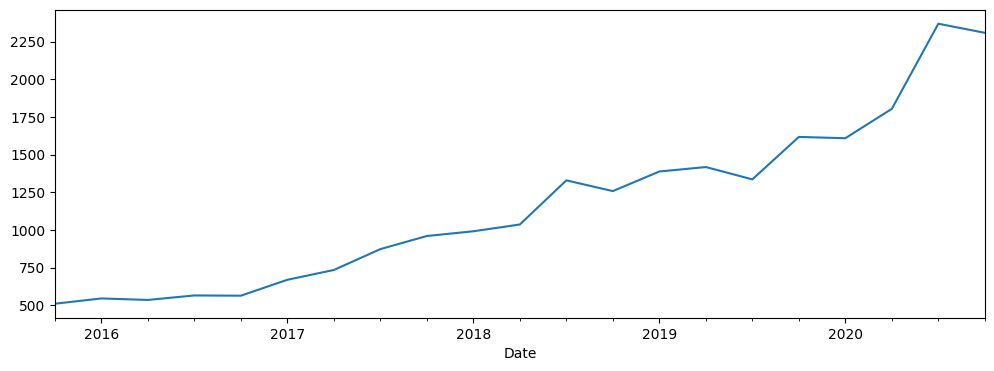

In [28]:
shares1.resample(rule='QS').max()['High'].plot(figsize=(12,4))

In [29]:
###Business End Frequency
shares1.resample(rule='BA').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,507.500000,509.850006,503.575012,507.700012,486.179596,13678054.0
2016-12-30,558.500000,564.775024,553.299988,555.400024,543.018372,32825622.0
2017-12-29,955.950012,959.500000,947.400024,952.549988,938.079102,58207852.0
2018-12-31,1316.300049,1329.000000,1295.000000,1319.000000,1306.896851,25898694.0
2019-12-31,1615.000000,1617.550049,1596.099976,1609.949951,1603.927490,47923444.0
2020-12-31,2325.000000,2369.350098,2310.550049,2324.550049,2324.550049,65230035.0


<Axes: xlabel='Date'>

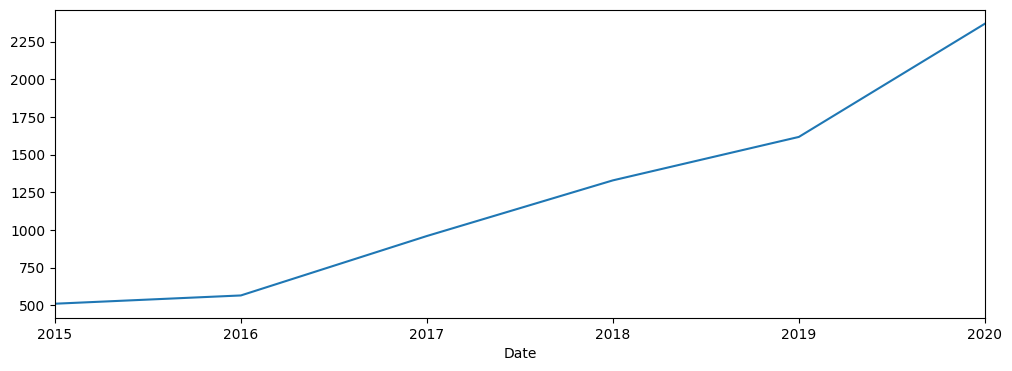

In [30]:
shares1.resample(rule='BA').max()['High'].plot(figsize=(12,4))

In [31]:
###Business Quarter Frequency
shares1.resample(rule='BQS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-10-01,507.500000,509.850006,503.575012,507.700012,486.179596,13678054.0
2016-01-01,537.500000,544.875000,532.799988,538.424988,515.602234,32825622.0
2016-04-01,534.599976,534.950012,527.700012,533.025024,521.142151,28321014.0
2016-07-01,558.500000,564.775024,553.299988,555.250000,542.871643,19484908.0
2016-10-03,557.000000,563.125000,553.250000,555.400024,543.018372,19936484.0
2017-01-02,659.424988,668.825012,649.025024,660.450012,645.726440,58207852.0
2017-04-03,730.000000,733.875000,715.299988,719.250000,703.215576,24202054.0
2017-07-03,856.099976,872.500000,845.099976,849.000000,836.102234,44410224.0
2017-10-02,955.950012,959.500000,947.400024,952.549988,938.079102,16765178.0


<Axes: xlabel='Date'>

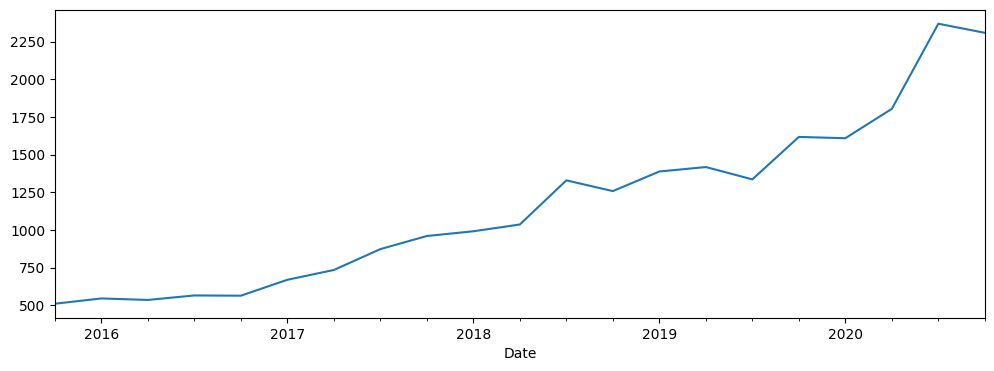

In [32]:
###Business End Frequency
shares1.resample(rule='BQS').max()['High'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

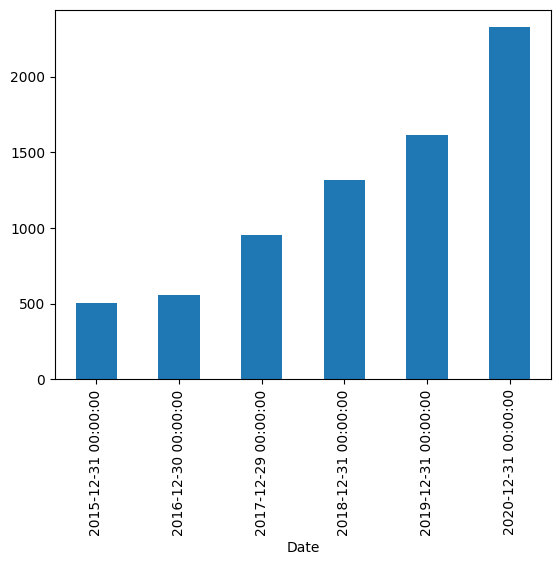

In [33]:
shares1['Open'].resample(rule='BA').max().plot(kind='bar')

<Axes: xlabel='Date'>

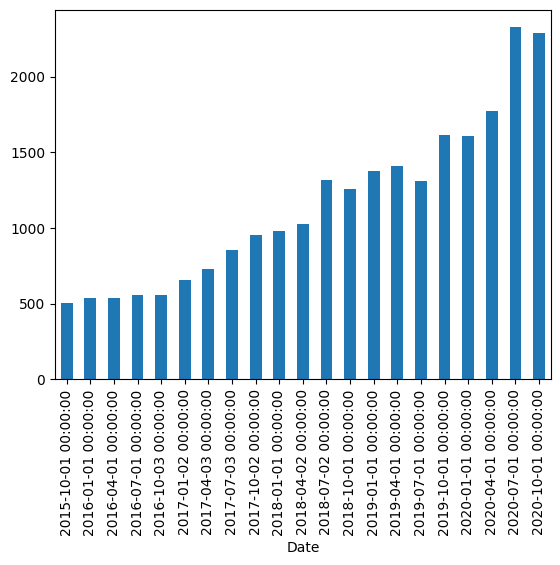

In [34]:
shares1['Open'].resample(rule='BQS').max().plot(kind='bar')

In [35]:
shares1['Open'].resample(rule='M').max()

Date
2015-11-30     494.500000
2015-12-31     507.500000
2016-01-31     537.500000
2016-02-29     519.974976
2016-03-31     523.450012
                 ...     
2020-07-31    2178.800049
2020-08-31    2174.000000
2020-09-30    2325.000000
2020-10-31    2290.000000
2020-11-30    2089.000000
Freq: M, Name: Open, Length: 61, dtype: float64

<Axes: xlabel='Date'>

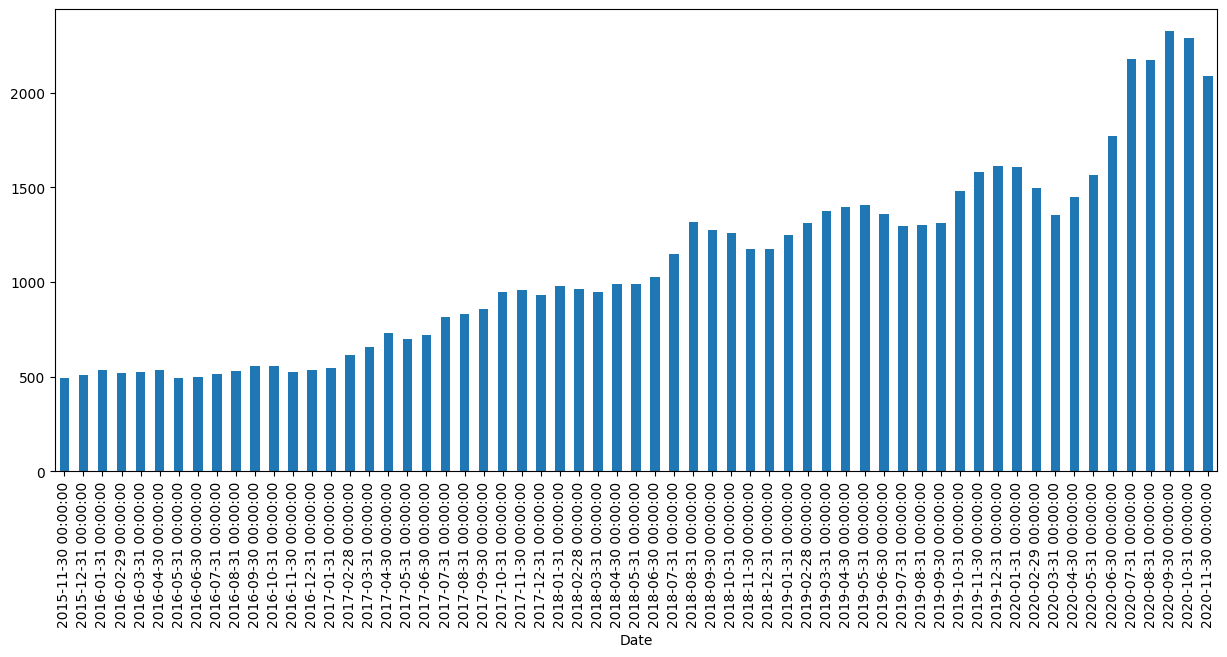

In [36]:
shares1['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))

In [37]:
#Rolling
shares1['Open:30 days rolling']=shares1['Open'].rolling(30).mean()

In [38]:
shares1.head(31)

,Open,High,Low,Close,Adj Close,Volume,Open:30 days rolling
Date,,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0,NaN
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0,NaN
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0,NaN
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0,NaN
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0,NaN
2015-11-26,485.500000,495.975006,484.125000,494.325012,473.371552,10883224.0,NaN
2015-11-27,494.500000,496.250000,487.049988,489.524994,468.774963,4979394.0,NaN
2015-11-30,489.250000,492.200012,481.149994,483.549988,463.053223,13678054.0,NaN
2015-12-01,482.000000,489.399994,480.625000,482.950012,462.478699,5934650.0,NaN


<Axes: xlabel='Date'>

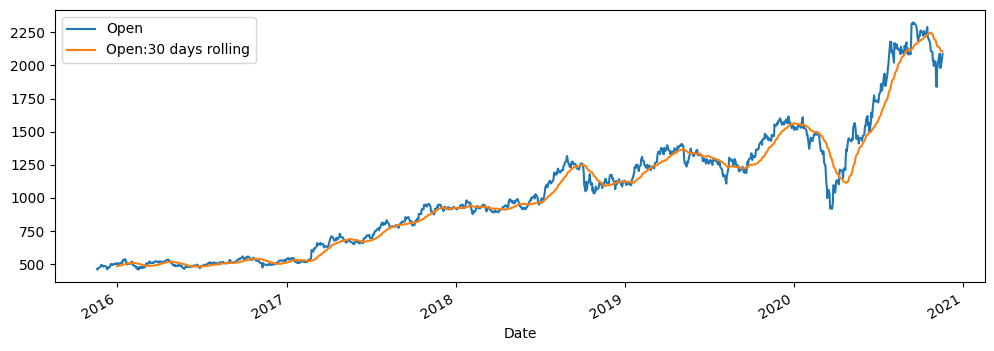

In [39]:
shares1[['Open','Open:30 days rolling']].plot(figsize=(12,4))

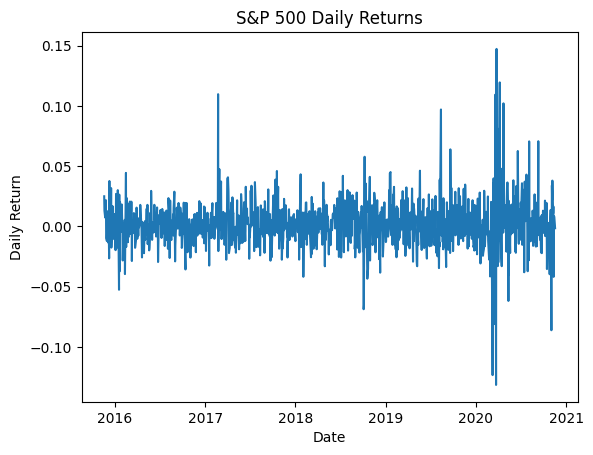

In [40]:
daily_returns = shares1['Close'].pct_change()

plt.plot(daily_returns.index, daily_returns.values)
plt.title('S&P 500 Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

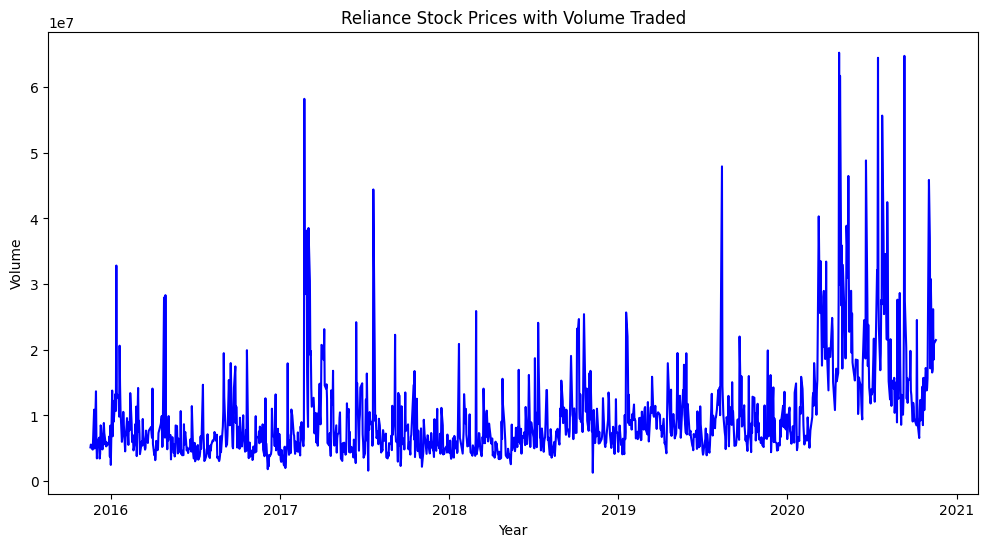

In [41]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Volume', data=shares1, color='b')
plt.title('Reliance Stock Prices with Volume Traded')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.show()

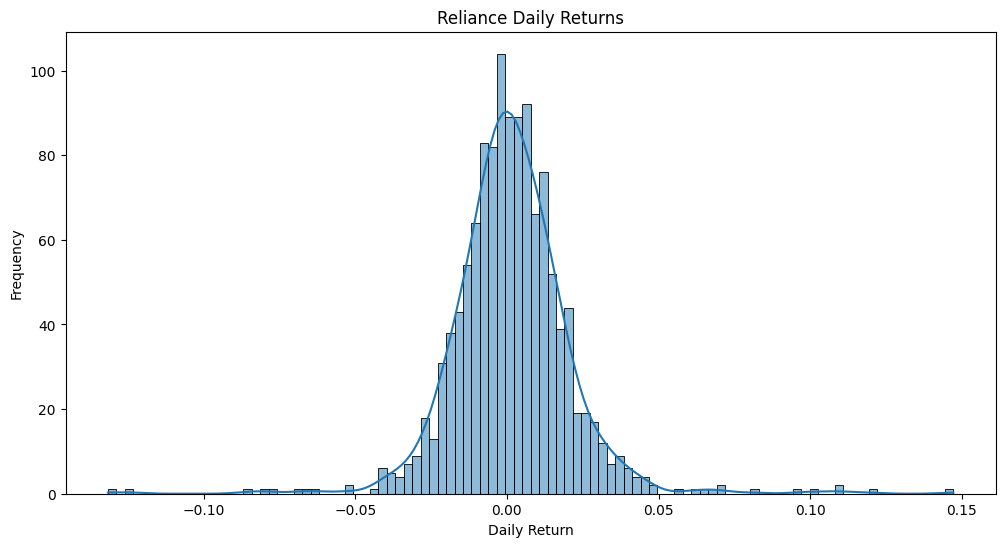

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(shares1['Close'].pct_change().dropna(), bins=100, kde=True)
plt.title('Reliance Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

In [43]:
#Simple Moving Average

In [44]:
shares1['Open:10 days rolling']=shares1['Open'].rolling(window=10,min_periods=1).mean()
shares1['Open:10 days rolling']

Date
2015-11-18     463.799988
2015-11-19     461.625000
2015-11-20     463.416667
2015-11-23     466.312500
2015-11-24     468.350000
                 ...     
2020-11-10    1991.035010
2020-11-11    1995.755005
2020-11-12    1994.155005
2020-11-13    1989.005005
2020-11-17    1994.805005
Name: Open:10 days rolling, Length: 1232, dtype: float64

<Axes: xlabel='Date'>

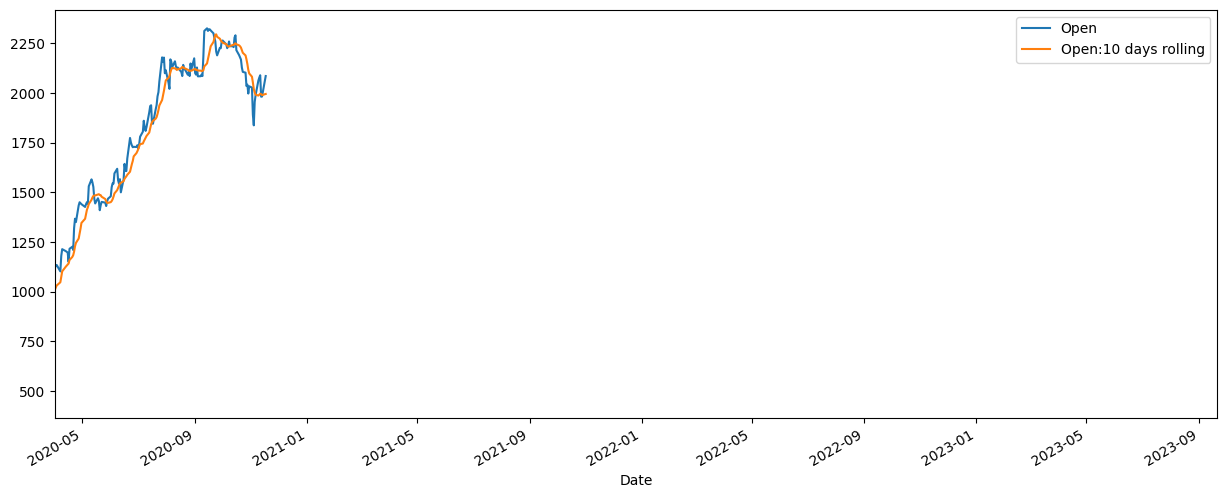

In [45]:
shares1[['Open','Open:10 days rolling']].plot(xlim=['2020-04-01','2023-09-21'],figsize=(15,6))

In [46]:
shares1['Open:30 days rolling']=shares1['Open'].rolling(window=30,min_periods=1).mean()
shares1['Open:50 days rolling']=shares1['Open'].rolling(window=50,min_periods=1).mean()

<Axes: xlabel='Date'>

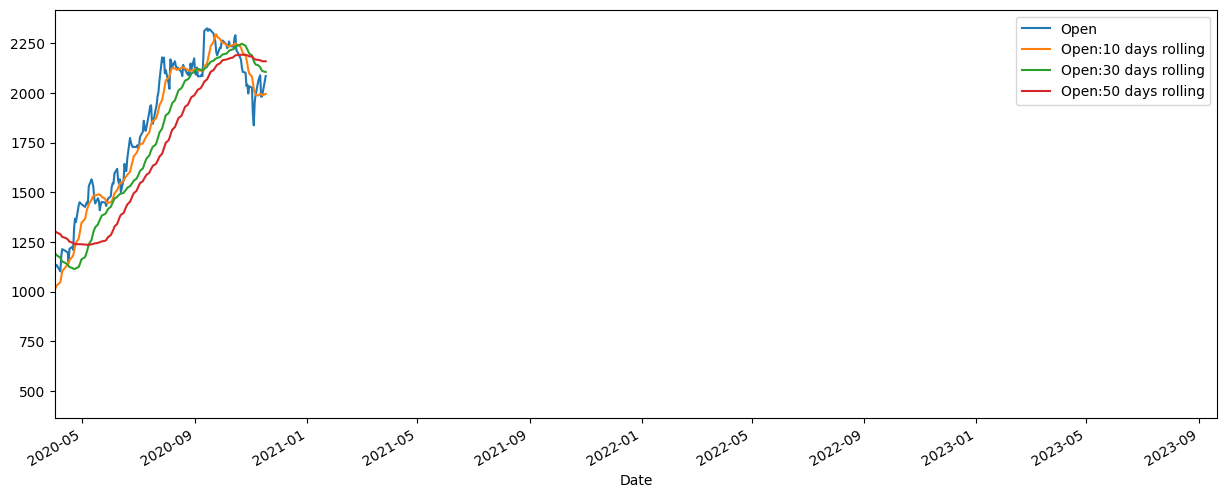

In [47]:
shares1[['Open','Open:10 days rolling','Open:30 days rolling','Open:50 days rolling']].plot(xlim=['2020-04-01','2023-09-21'],figsize=(15,6))

In [48]:
##Cumulative Moving Average(Expanding)

<Axes: xlabel='Date'>

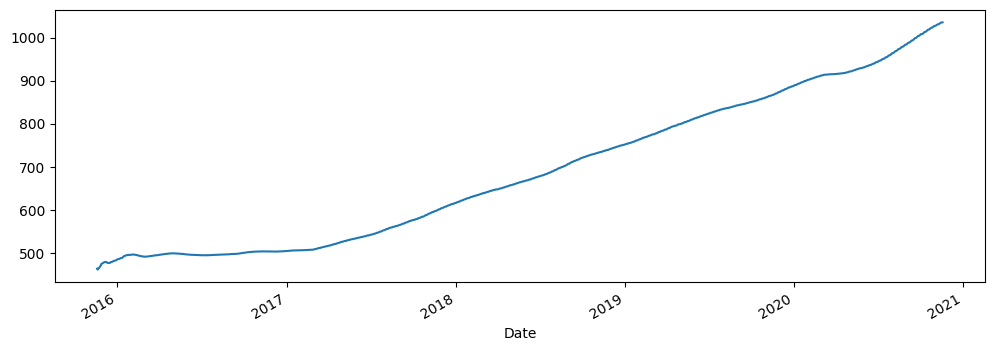

In [49]:
shares1['Open'].expanding().mean().plot(figsize=(12,4))

In [50]:
##Exponential Moving Average

In [51]:
#Consider smoothing factor=0.1
shares1['EMA_0.1']=shares1['Open'].ewm(alpha=0.1,adjust=False).mean()

<Axes: xlabel='Date'>

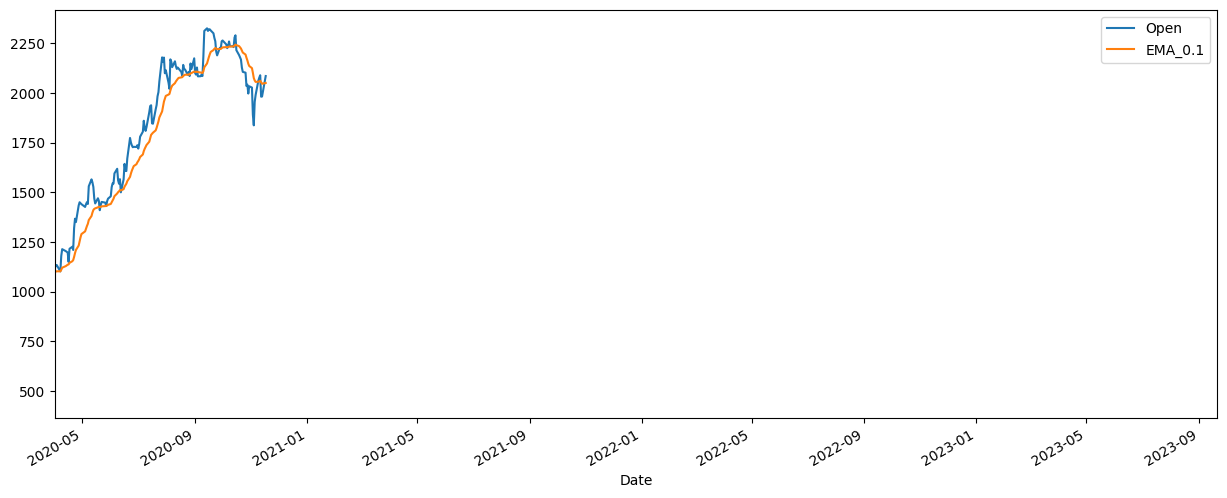

In [52]:
shares1[['Open','EMA_0.1']].plot(xlim=['2020-04-01','2023-09-21'],figsize=(15,6))

In [53]:
shares1['EMA_0.3']=shares1['Open'].ewm(alpha=0.3,adjust=False).mean()

<Axes: xlabel='Date'>

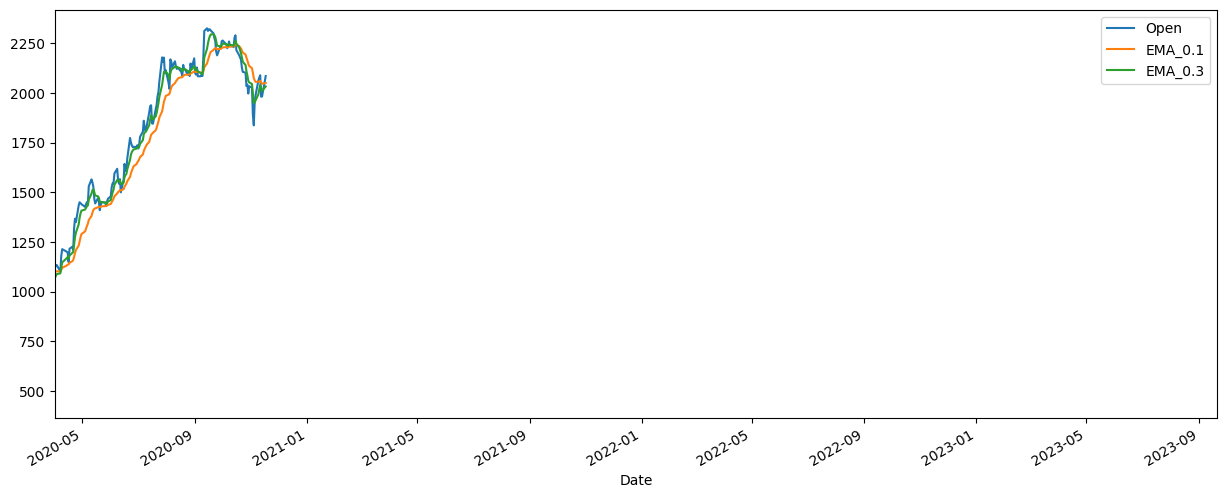

In [54]:
shares1[['Open','EMA_0.1','EMA_0.3']].plot(xlim=['2020-04-01','2023-09-21'],figsize=(15,6))

In [55]:
shares1['EMA_5days']=shares1['Open'].ewm(span=5).mean()

<Axes: xlabel='Date'>

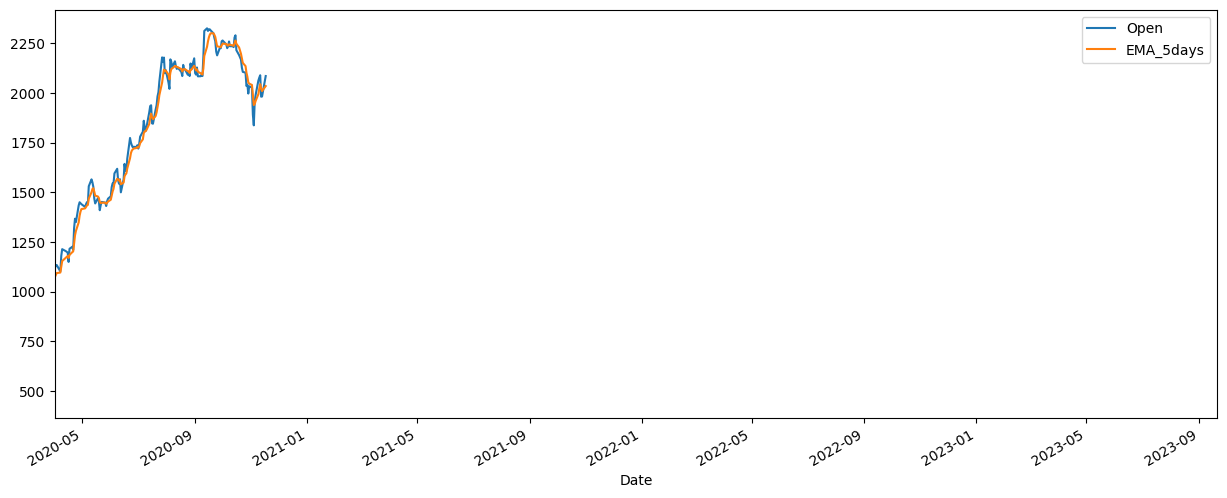

In [56]:
shares1[['Open','EMA_5days']].plot(xlim=['2020-04-01','2023-09-21'],figsize=(15,6))

<Axes: xlabel='Date'>

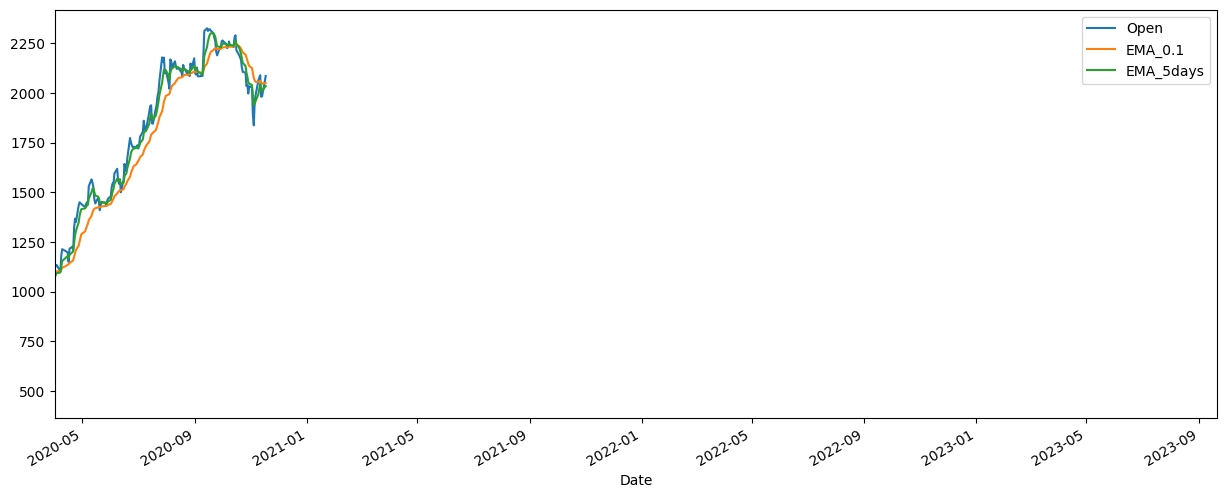

In [57]:
shares1[['Open','EMA_0.1','EMA_5days']].plot(xlim=['2020-04-01','2023-09-21'],figsize=(15,6))

In [58]:
shares2=shares1.drop(['Open:30 days rolling','Open:10 days rolling','Open:50 days rolling','EMA_0.1','EMA_0.3','EMA_5days'],axis=1)
shares2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0
...,...,...,...,...,...,...
2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0
2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0
2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0


In [59]:
from statsmodels.tsa.stattools import adfuller

In [60]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [61]:
adf_test(shares2['Open'])

ADF Statistics: 0.018852374771085367
p- value: 0.9600636715601404
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [62]:
adf_test(shares2['High'])

ADF Statistics: 0.08655240151957667
p- value: 0.9651308800325651
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [63]:
adf_test(shares2['Low'])

ADF Statistics: -0.2605324116145838
p- value: 0.9309111022679657
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [64]:
adf_test(shares2['Close'])

ADF Statistics: -0.2936940011145342
p- value: 0.926392714138908
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [65]:
adf_test(shares2['Adj Close'])

ADF Statistics: -0.2786527631456173
p- value: 0.9284737963091881
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [66]:
adf_test(shares2['Volume'])

ADF Statistics: -3.480600970156911
p- value: 0.00849950521991433
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [67]:
## Use Techniques Differencing
shares2['Open First Difference']=shares2['Open']-shares2['Open'].shift(1)

In [68]:
shares2.head()

,Open,High,Low,Close,Adj Close,Volume,Open First Difference
Date,,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0,NaN
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0,-4.349976
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0,7.549988
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0,8.000000
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0,1.500000


In [69]:
adf_test(shares2['Open First Difference'].dropna())

ADF Statistics: -33.19896561679297
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [70]:
shares2['Open 12 Difference']=shares2['Open']-shares2['Open'].shift(12)
shares2.head()

,Open,High,Low,Close,Adj Close,Volume,Open First Difference,Open 12 Difference
Date,,,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0,NaN,NaN
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0,-4.349976,NaN
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0,7.549988,NaN
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0,8.000000,NaN
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0,1.500000,NaN


In [71]:
adf_test(shares2['Open 12 Difference'].dropna())

ADF Statistics: -6.950957432271879
p- value: 9.695849844980604e-10
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [72]:
shares2['High First Difference']=shares2['High']-shares2['High'].shift(1)
shares2

,Open,High,Low,Close,Adj Close,Volume,Open First Difference,Open 12 Difference,High First Difference
Date,,,,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0,NaN,NaN,NaN
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0,-4.349976,NaN,3.700012
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0,7.549988,NaN,7.049988
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0,8.000000,NaN,2.550018
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0,1.500000,NaN,6.849976
...,...,...,...,...,...,...,...,...,...
2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0,14.899902,-29.000000,21.000000
2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0,12.000000,-12.949951,5.000000
2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0,-108.000000,-53.900024,-86.550049


In [73]:
adf_test(shares2['High First Difference'].dropna())

ADF Statistics: -12.64684873275481
p- value: 1.3957035304801787e-23
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [74]:
shares2['High 12 Difference']=shares2['High']-shares2['High'].shift(12)
shares2.head()

,Open,High,Low,Close,Adj Close,Volume,Open First Difference,Open 12 Difference,High First Difference,High 12 Difference
Date,,,,,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0,NaN,NaN,NaN,NaN
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0,-4.349976,NaN,3.700012,NaN
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0,7.549988,NaN,7.049988,NaN
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0,8.000000,NaN,2.550018,NaN
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0,1.500000,NaN,6.849976,NaN


In [75]:
adf_test(shares2['High 12 Difference'].dropna())

ADF Statistics: -6.206437730984537
p- value: 5.6428858265195206e-08
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [76]:
shares2['Low First Difference']=shares2['Low']-shares2['Low'].shift(1)
shares2

,Open,High,Low,Close,Adj Close,Volume,Open First Difference,Open 12 Difference,High First Difference,High 12 Difference,Low First Difference
Date,,,,,,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0,NaN,NaN,NaN,NaN,NaN
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0,-4.349976,NaN,3.700012,NaN,3.649994
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0,7.549988,NaN,7.049988,NaN,4.149994
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0,8.000000,NaN,2.550018,NaN,10.325012
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0,1.500000,NaN,6.849976,NaN,2.424988
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0,14.899902,-29.000000,21.000000,-45.000000,5.199951
2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0,12.000000,-12.949951,5.000000,-6.949951,-63.099975
2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0,-108.000000,-53.900024,-86.550049,-51.400147,-13.099976


In [77]:
adf_test(shares2['Low First Difference'].dropna())

ADF Statistics: -7.495661774182631
p- value: 4.3866627837246254e-11
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [78]:
shares2['Low 12 Difference']=shares2['Low']-shares2['Low'].shift(12)
shares2.head()

,Open,High,Low,Close,Adj Close,Volume,Open First Difference,Open 12 Difference,High First Difference,High 12 Difference,Low First Difference,Low 12 Difference
Date,,,,,,,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0,-4.349976,NaN,3.700012,NaN,3.649994,NaN
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0,7.549988,NaN,7.049988,NaN,4.149994,NaN
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0,8.000000,NaN,2.550018,NaN,10.325012,NaN
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0,1.500000,NaN,6.849976,NaN,2.424988,NaN


In [79]:
adf_test(shares2['Low 12 Difference'].dropna())

ADF Statistics: -6.813140738110476
p- value: 2.0914402760840724e-09
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [80]:
shares2['Close First Difference']=shares2['Close']-shares2['Close'].shift(1)
shares2.head()

,Open,High,Low,Close,Adj Close,Volume,Open First Difference,Open 12 Difference,High First Difference,High 12 Difference,Low First Difference,Low 12 Difference,Close First Difference
Date,,,,,,,,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0,-4.349976,NaN,3.700012,NaN,3.649994,NaN,11.375000
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0,7.549988,NaN,7.049988,NaN,4.149994,NaN,6.049988
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0,8.000000,NaN,2.550018,NaN,10.325012,NaN,3.450012
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0,1.500000,NaN,6.849976,NaN,2.424988,NaN,6.975006


In [81]:
adf_test(shares2['Close First Difference'].dropna())

ADF Statistics: -9.009860680634729
p- value: 6.167574882466307e-15
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [82]:
shares2['Close 12 Difference']=shares2['Close']-shares2['Close'].shift(12)
shares2.head()

,Open,High,Low,Close,Adj Close,Volume,Open First Difference,Open 12 Difference,High First Difference,High 12 Difference,Low First Difference,Low 12 Difference,Close First Difference,Close 12 Difference
Date,,,,,,,,,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0,-4.349976,NaN,3.700012,NaN,3.649994,NaN,11.375000,NaN
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0,7.549988,NaN,7.049988,NaN,4.149994,NaN,6.049988,NaN
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0,8.000000,NaN,2.550018,NaN,10.325012,NaN,3.450012,NaN
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0,1.500000,NaN,6.849976,NaN,2.424988,NaN,6.975006,NaN


In [83]:
adf_test(shares2['Close 12 Difference'].dropna())

ADF Statistics: -5.916236071411541
p- value: 2.568904919771688e-07
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [84]:
shares2['Adj Close First Difference']=shares2['Adj Close']-shares2['Adj Close'].shift(1)
shares2.head()

,Open,High,Low,Close,Adj Close,Volume,Open First Difference,Open 12 Difference,High First Difference,High 12 Difference,Low First Difference,Low 12 Difference,Close First Difference,Close 12 Difference,Adj Close First Difference
Date,,,,,,,,,,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0,-4.349976,NaN,3.700012,NaN,3.649994,NaN,11.375000,NaN,10.892852
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0,7.549988,NaN,7.049988,NaN,4.149994,NaN,6.049988,NaN,5.793549
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0,8.000000,NaN,2.550018,NaN,10.325012,NaN,3.450012,NaN,3.303802
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0,1.500000,NaN,6.849976,NaN,2.424988,NaN,6.975006,NaN,6.679291


In [85]:
adf_test(shares2['Adj Close First Difference'].dropna())

ADF Statistics: -8.980630079983692
p- value: 7.326708949053516e-15
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [86]:
shares2['Adj Close 12 Difference']=shares2['Adj Close']-shares2['Adj Close'].shift(12)
shares2.head()

,Open,High,Low,Close,Adj Close,Volume,Open First Difference,Open 12 Difference,High First Difference,High 12 Difference,Low First Difference,Low 12 Difference,Close First Difference,Close 12 Difference,Adj Close First Difference,Adj Close 12 Difference
Date,,,,,,,,,,,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0,-4.349976,NaN,3.700012,NaN,3.649994,NaN,11.375000,NaN,10.892852,NaN
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0,7.549988,NaN,7.049988,NaN,4.149994,NaN,6.049988,NaN,5.793549,NaN
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0,8.000000,NaN,2.550018,NaN,10.325012,NaN,3.450012,NaN,3.303802,NaN
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0,1.500000,NaN,6.849976,NaN,2.424988,NaN,6.975006,NaN,6.679291,NaN


In [87]:
adf_test(shares2['Adj Close 12 Difference'].dropna())

ADF Statistics: -5.897058623347538
p- value: 2.8350914221016427e-07
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [88]:
shares2['Volume First Difference']=shares2['Volume']-shares2['Volume'].shift(1)
shares2.head()

,Open,High,Low,Close,Adj Close,Volume,Open First Difference,Open 12 Difference,High First Difference,High 12 Difference,Low First Difference,Low 12 Difference,Close First Difference,Close 12 Difference,Adj Close First Difference,Adj Close 12 Difference,Volume First Difference
Date,,,,,,,,,,,,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0,-4.349976,NaN,3.700012,NaN,3.649994,NaN,11.375000,NaN,10.892852,NaN,426986.0
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0,7.549988,NaN,7.049988,NaN,4.149994,NaN,6.049988,NaN,5.793549,NaN,-401822.0
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0,8.000000,NaN,2.550018,NaN,10.325012,NaN,3.450012,NaN,3.303802,NaN,-367904.0
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0,1.500000,NaN,6.849976,NaN,2.424988,NaN,6.975006,NaN,6.679291,NaN,1968860.0


In [89]:
adf_test(shares2['Volume First Difference'].dropna())

ADF Statistics: -11.456482783262018
p- value: 5.6901908162537894e-21
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [90]:
shares2['Volume 12 Difference']=shares2['Volume']-shares2['Volume'].shift(12)
shares2.head()

,Open,High,Low,Close,Adj Close,Volume,Open First Difference,Open 12 Difference,High First Difference,High 12 Difference,Low First Difference,Low 12 Difference,Close First Difference,Close 12 Difference,Adj Close First Difference,Adj Close 12 Difference,Volume First Difference,Volume 12 Difference
Date,,,,,,,,,,,,,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0,-4.349976,NaN,3.700012,NaN,3.649994,NaN,11.375000,NaN,10.892852,NaN,426986.0,NaN
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0,7.549988,NaN,7.049988,NaN,4.149994,NaN,6.049988,NaN,5.793549,NaN,-401822.0,NaN
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0,8.000000,NaN,2.550018,NaN,10.325012,NaN,3.450012,NaN,3.303802,NaN,-367904.0,NaN
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0,1.500000,NaN,6.849976,NaN,2.424988,NaN,6.975006,NaN,6.679291,NaN,1968860.0,NaN


In [91]:
adf_test(shares2['Volume 12 Difference'].dropna())

ADF Statistics: -11.664323166310119
p- value: 1.9001954536709486e-21
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [92]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

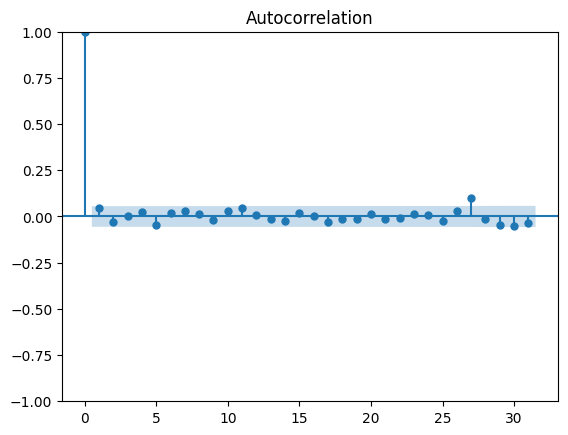

In [93]:
acf_open1=plot_acf(shares2['Open First Difference'].dropna())

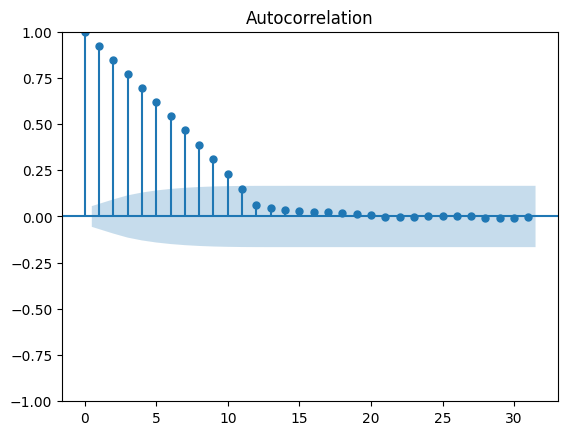

In [94]:
acf_open12=plot_acf(shares2['Open 12 Difference'].dropna())

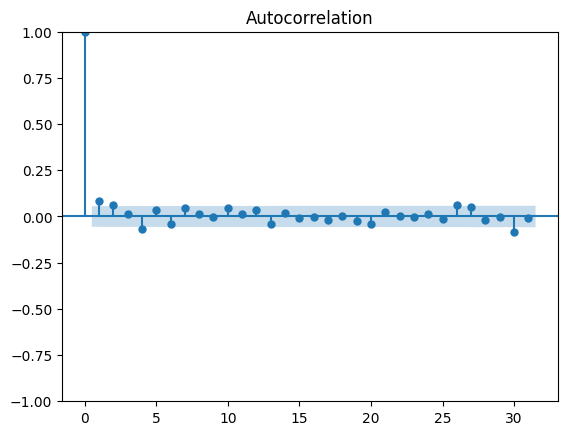

In [95]:
acf_high1=plot_acf(shares2['High First Difference'].dropna())

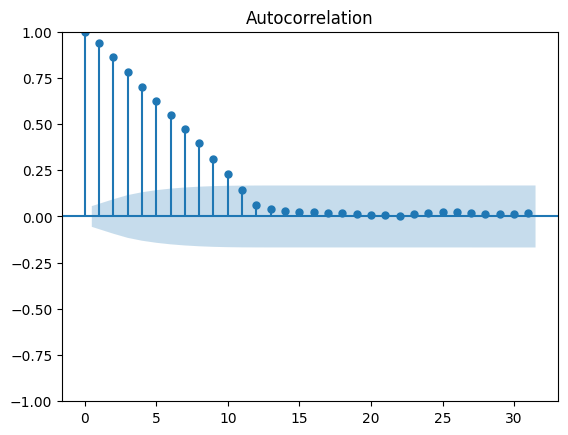

In [96]:
acf_high12=plot_acf(shares2['High 12 Difference'].dropna())

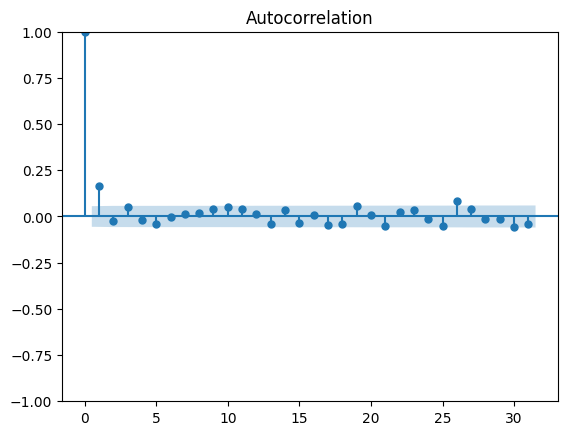

In [97]:
acf_low1=plot_acf(shares2['Low First Difference'].dropna())

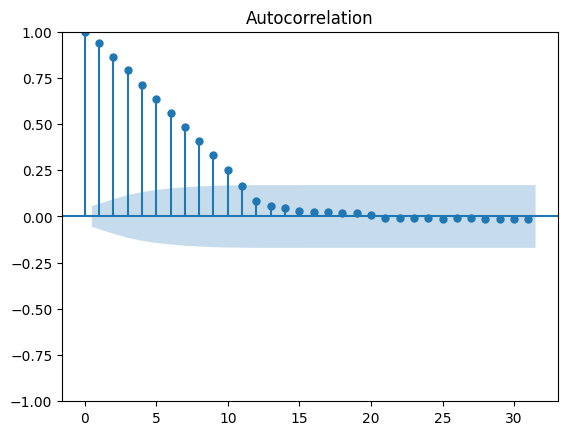

In [98]:
acf_low12=plot_acf(shares2['Low 12 Difference'].dropna())

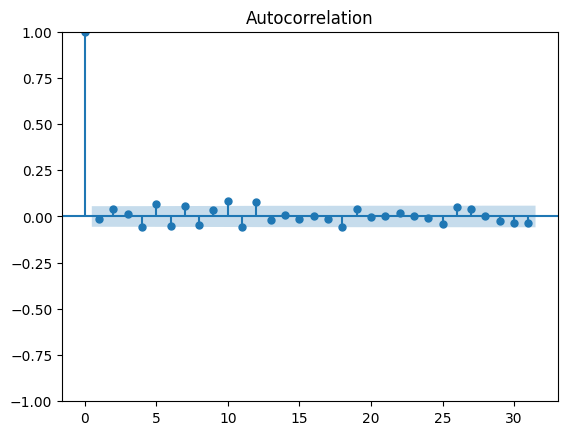

In [99]:
acf_close1=plot_acf(shares2['Close First Difference'].dropna())

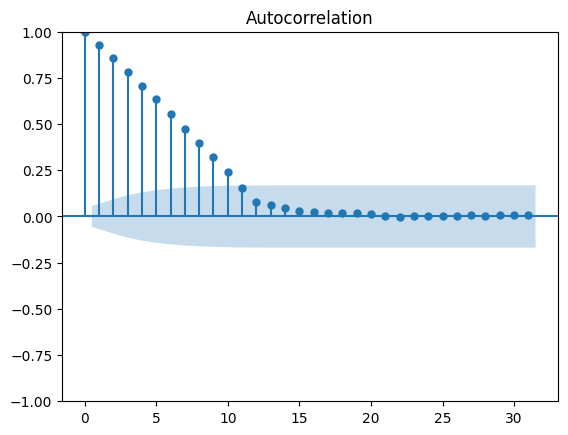

In [100]:
acf_close12=plot_acf(shares2['Close 12 Difference'].dropna())

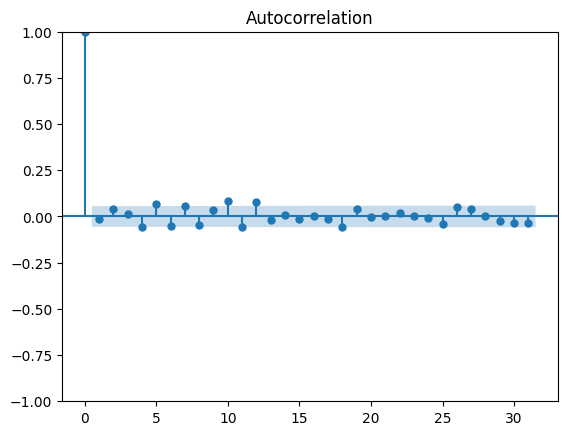

In [101]:
acf_adj1=plot_acf(shares2['Adj Close First Difference'].dropna())

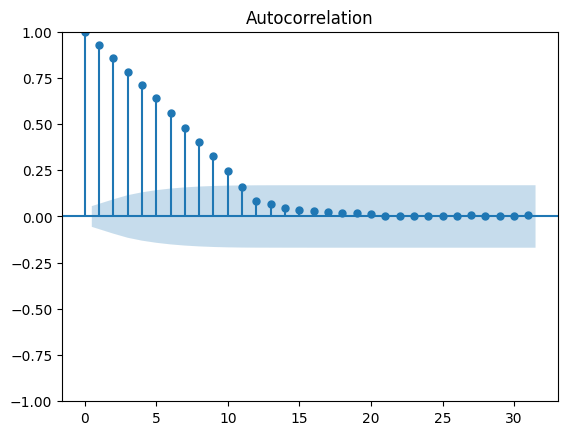

In [102]:
acf_adj12=plot_acf(shares2['Adj Close 12 Difference'].dropna())

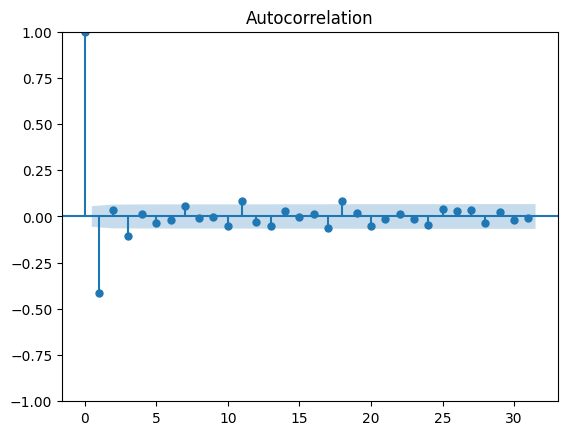

In [103]:
acf_vol1=plot_acf(shares2['Volume First Difference'].dropna())

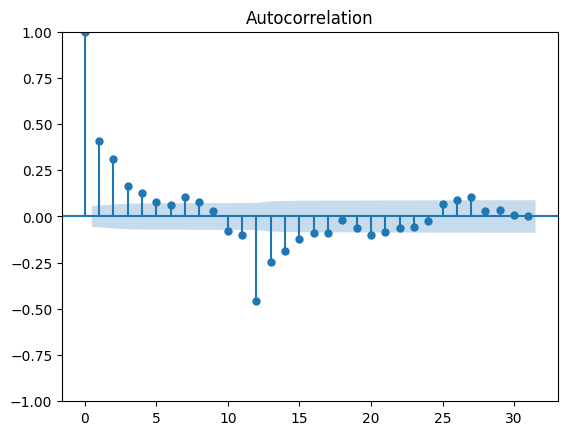

In [104]:
acf_vol12=plot_acf(shares2['Volume 12 Difference'].dropna())

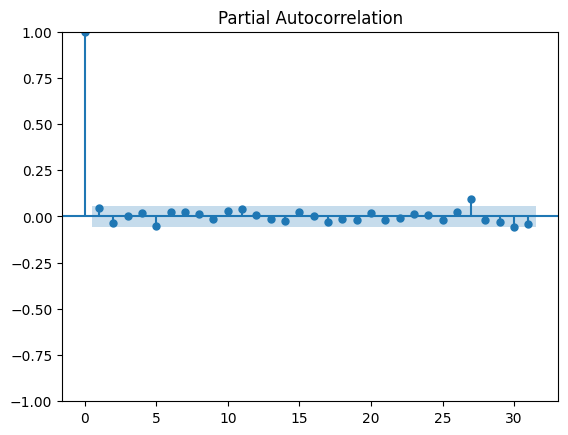

In [105]:
pacf_open1=plot_pacf(shares2['Open First Difference'].dropna())

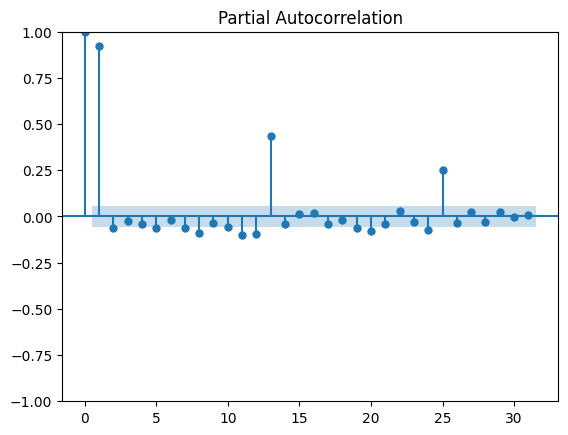

In [106]:
pacf_open12=plot_pacf(shares2['Open 12 Difference'].dropna())

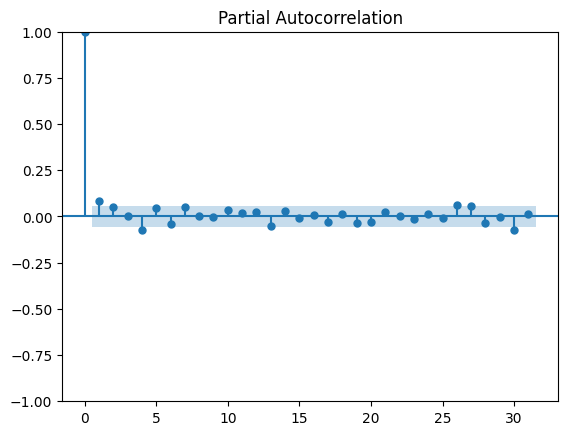

In [107]:
pacf_high1=plot_pacf(shares2['High First Difference'].dropna())

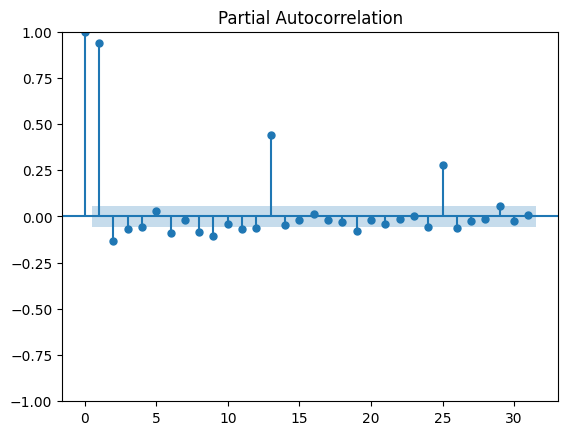

In [108]:
pacf_high12=plot_pacf(shares2['High 12 Difference'].dropna())

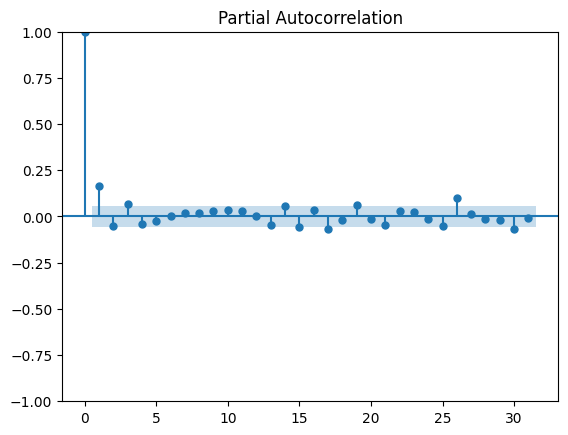

In [109]:
pacf_low1=plot_pacf(shares2['Low First Difference'].dropna())

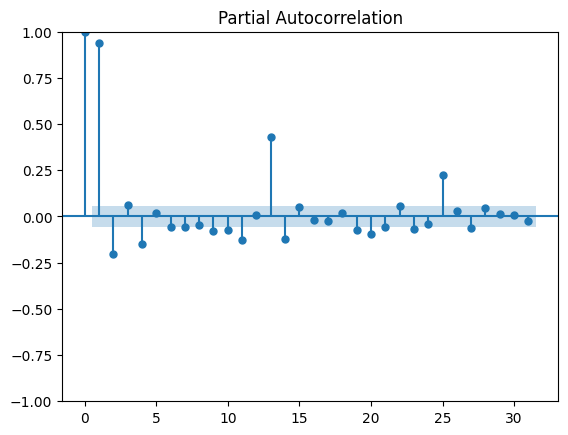

In [110]:
pacf_low12=plot_pacf(shares2['Low 12 Difference'].dropna())

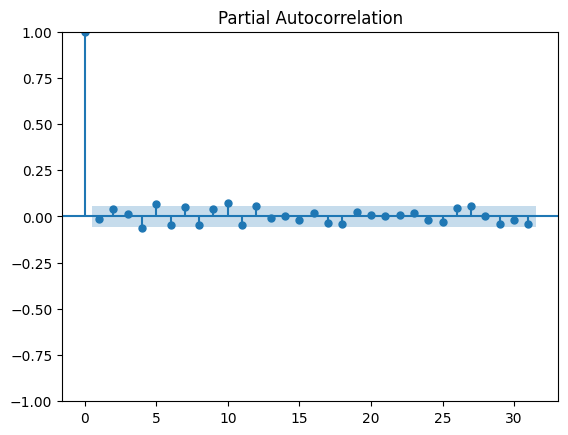

In [111]:
pacf_close1=plot_pacf(shares2['Close First Difference'].dropna())

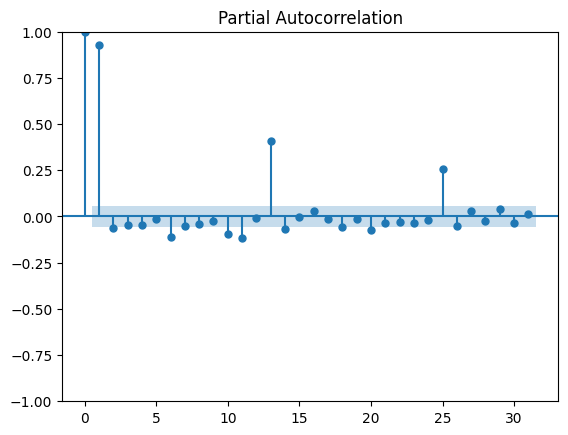

In [112]:
pacf_close12=plot_pacf(shares2['Close 12 Difference'].dropna())

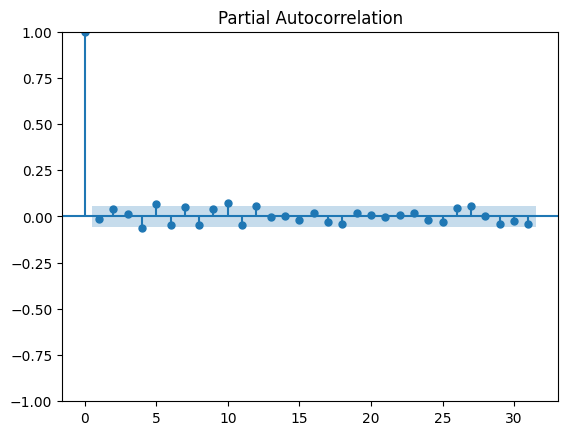

In [113]:
pacf_adj1=plot_pacf(shares2['Adj Close First Difference'].dropna())

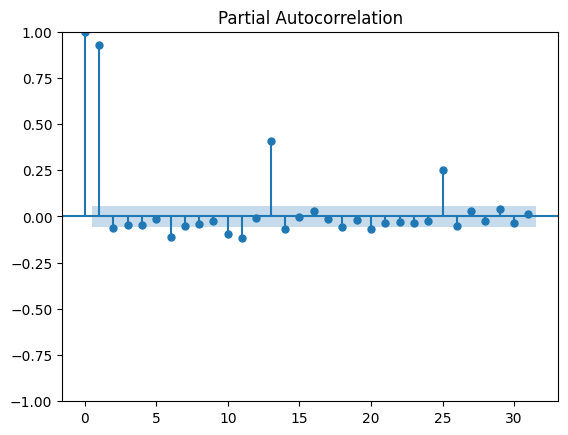

In [114]:
pacf_adj12=plot_pacf(shares2['Adj Close 12 Difference'].dropna())

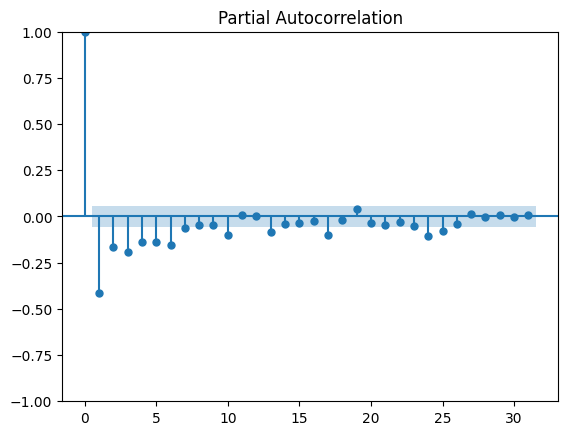

In [115]:
pacf_vol1=plot_pacf(shares2['Volume First Difference'].dropna())

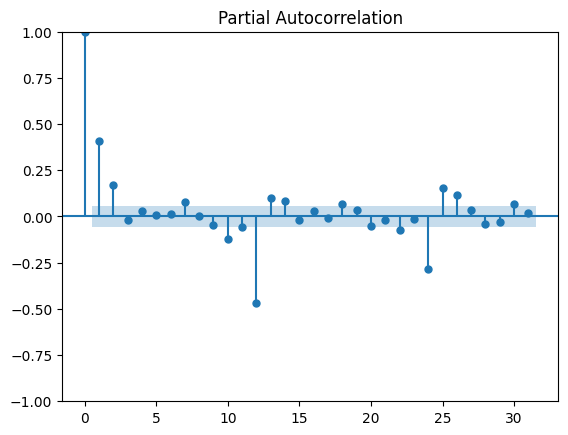

In [116]:
pacf_vol12=plot_pacf(shares2['Volume 12 Difference'].dropna())

In [117]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2022,12,31)
test_dataset_end=datetime(2023,9,21)

In [118]:
train_data=shares2[:train_dataset_end]
test_data=shares2[train_dataset_end+timedelta(days=1):test_dataset_end]

In [119]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

IndexError: ignored

In [120]:
test_data

,Open,High,Low,Close,Adj Close,Volume,Open First Difference,Open 12 Difference,High First Difference,High 12 Difference,Low First Difference,Low 12 Difference,Close First Difference,Close 12 Difference,Adj Close First Difference,Adj Close 12 Difference,Volume First Difference,Volume 12 Difference
Date,,,,,,,,,,,,,,,,,,


In [126]:
test_data

,Open,High,Low,Close,Adj Close,Volume,Open First Difference,Open 12 Difference,High First Difference,High 12 Difference,Low First Difference,Low 12 Difference,Close First Difference,Close 12 Difference,Adj Close First Difference,Adj Close 12 Difference,Volume First Difference,Volume 12 Difference
Date,,,,,,,,,,,,,,,,,,


In [ ]:
train_data

In [121]:
from statsmodels.tsa.arima.model import ARIMA

In [122]:
model_ARIMA=ARIMA(train_data['Volume'],order=(10,1,0))

In [123]:
model_Arima_fit=model_ARIMA.fit()

In [124]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Volume   No. Observations:                 1232
Model:                ARIMA(10, 1, 0)   Log Likelihood              -20862.120
Date:                Fri, 06 Oct 2023   AIC                          41746.239
Time:                        05:16:44   BIC                          41802.511
Sample:                             0   HQIC                         41767.410
                               - 1232                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5949      0.022    -27.167      0.000      -0.638      -0.552
ar.L2         -0.3914      0.021    -18.722      0.000      -0.432      -0.350
ar.L3         -0.3953      0.024    -16.403      0.000      -0.443      -0.348
ar.L4         -0.3299      0.031    -10.726      0.000      -0.390      -0.270
ar.L5         -0.3017      0.032     -9.318      0.000      -0.365      -0.238
ar.L6         -0.2530      0.027     -9.440      0.000      -0.305      -0.200
ar.L7         -0.1423      0.030     -4.723      0.000      -0.201      -0.083
ar.L8         -0.1130      0.031     -3.647      0.000      -0.174      -0.052
ar.L9         -0.1071      0.031     -3.410      0.001      -0.169      -0.046
ar.L10        -0.1001      0.024     -4.237      0.000      -0.146      -0.054
sigma2      3.088e+13   1.57e-15   1.96e+28      0.000    3.09e+13    3.09e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             24737.18
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                             3.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.38e+42. Standard errors may be unstable.
"""

If P<0.05, it means that it has a higher impact.
Here, from the observation we notiiced that the Volume column is having a greater impact on the stock prices when compared to the other column.

In [125]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

IndexError: ignored

In [ ]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)